In [18]:
import numpy as np
import pandas as pd
from datetime import datetime

In [19]:
from methods.divide_dataframe import divide_dataframe
from models_raw.classic_models.logistic_regression.logistic_regression_fit import log_regression_fit
from models_raw.classic_models.logistic_regression.logistic_regression_predict import log_regression_predict_with_target, log_regression_predict_without_target

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# {k:np.sum if k in {'col3','col4'} else k:np.average for k in df.columns if k not in {'col1','col2'}

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
large_credit_takers = [
    53123153,
    52175920,	
    53031443,	
    52423025,	
    51787828,
]

In [24]:
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df_bki = pd.read_csv('data/df_BKI_30k.csv', index_col=False, low_memory=False)

In [25]:
df_no_target = pd.read_csv('data/df_test_notarget_10k.csv', index_col=False, low_memory=False)

In [26]:
df_bki.shape

(481335, 92)

In [27]:
df_no_target.shape

(159393, 92)

In [28]:
df_target = pd.read_csv('data/df_target_30k.csv', index_col=False, low_memory=False)

In [ ]:
final_df = divide_dataframe(df_bki, df_target)

d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates[cols_for_datetime_format] = df_dates[cols_for_datetime_format].apply(pd.to_datetime)
d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['credit_duration'] = (df_dates['trade_close_dt'] - df_dates['trade_opened_dt']).dt.days
d:\PYTHON_PROJECTS\MIPT-hack

In [ ]:
final_df_no_target = divide_dataframe(df_no_target)

d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates[cols_for_datetime_format] = df_dates[cols_for_datetime_format].apply(pd.to_datetime)
d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['credit_duration'] = (df_dates['trade_close_dt'] - df_dates['trade_opened_dt']).dt.days
d:\PYTHON_PROJECTS\MIPT-hack

In [ ]:
for col in [x for x in final_df.columns if x != 'target']:
    if col not in final_df_no_target.columns:
        final_df.drop(columns=[col], inplace=True)

In [ ]:
del df_bki

In [ ]:
logerg_pickle_file_path = 'models_saved/classic_models/logistic_regression/'

In [ ]:
cols_to_drop, model_summary = log_regression_fit(final_df, logerg_pickle_file_path)

KeyError: 'target'

In [ ]:
logreg_predict = log_regression_predict_with_target(final_df, cols_to_drop, logerg_pickle_file_path)

LogRegression test score: 0.7817777777777778
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7036
           1       0.50      0.03      0.06      1964

    accuracy                           0.78      9000
   macro avg       0.64      0.51      0.47      9000
weighted avg       0.72      0.78      0.70      9000



In [ ]:
model_summary.head(10)

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
10,account_amt_credit_limit_sum,numerical,OPTIMAL,True,5,0.097516,0.012096,0.173169,0.353728
51,due_arrear_principal_outstanding_sum,numerical,OPTIMAL,True,5,0.088279,0.010959,0.159466,0.103432
47,due_arrear_amt_outstanding_sum,numerical,OPTIMAL,True,5,0.088066,0.010933,0.159338,0.095827
31,arrear_start_amt_outstanding_sum,numerical,OPTIMAL,True,5,0.085431,0.0106,0.161179,0.310728
82,trade_loan_kind_code_1.0,numerical,OPTIMAL,True,6,0.080702,0.009989,0.148597,0.25055
53,due_arrear_principal_outstanding_max,numerical,OPTIMAL,True,5,0.077281,0.009615,0.149429,0.260141
49,due_arrear_amt_outstanding_max,numerical,OPTIMAL,True,5,0.076459,0.009511,0.150951,0.167279
109,account_amt_credit_limit_1.0,numerical,OPTIMAL,True,6,0.07624,0.009478,0.1472,0.151778
11,account_amt_credit_limit_max,numerical,OPTIMAL,True,5,0.073199,0.009104,0.15021,0.261809
68,past_due_int_amt_past_due_mean,numerical,OPTIMAL,True,4,0.072764,0.009026,0.121791,0.029286


In [ ]:
# optb = binning_process.get_binned_variable("negative_score_to_categorical_no_overdue")

In [ ]:
for col in final_df.columns:
    if col not in final_df_no_target.columns:
        print(col)

coborrower_solidary_num_5.0
collat_repay_code_2.0
target


In [ ]:
predicted = log_regression_predict_without_target(final_df_no_target, cols_to_drop, logerg_pickle_file_path)

In [ ]:
predicted

['opened_to_closed_credit_ratio',
 'account_amt_credit_limit_min',
 'paymnt_condition_principal_terms_amt_mean',
 'paymnt_condition_interest_terms_amt_min',
 'arrear_start_amt_outstanding_min',
 'arrear_int_outstanding_min',
 'arrear_other_amt_outstanding_min',
 'arrear_other_amt_outstanding_mean',
 'due_arrear_int_outstanding_min',
 'due_arrear_other_amtoutstanding_min',
 'due_arrear_other_amtoutstanding_mean',
 'past_due_amt_past_due_min',
 'past_due_principal_amt_past_due_min',
 'past_due_int_amt_past_due_min',
 'past_due_other_amt_past_due_min',
 'delay5_min',
 'delay5_mean',
 'delay30_sum',
 'delay30_min',
 'delay30_max',
 'delay30_mean',
 'delay60_sum',
 'delay60_min',
 'delay60_max',
 'delay90_sum',
 'delay90_min',
 'delay90_max',
 'delay_more_min',
 'cred_max_overdue_sum',
 'cred_max_overdue_min',
 'cred_max_overdue_max',
 'trade_owner_indic_2.0',
 'trade_owner_indic_4.0',
 'trade_owner_indic_99.0',
 'trade_trade_type_code_2.0',
 'trade_trade_type_code_4.0',
 'trade_trade_type_

In [34]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",3488,0.166095,2461,1027,0.294438,-0.435569,0.035384,0.004388
1,"[0.50, 1.50)",2406,0.114571,1810,596,0.247714,-0.198653,0.004778,0.000596
2,"[1.50, 2.50)",1792,0.085333,1380,412,0.229911,-0.100679,0.000890,0.000111
3,"[2.50, 6.50)",4626,0.220286,3673,953,0.206010,0.039655,0.000342,0.000043
4,"[6.50, inf)",8688,0.413714,7212,1476,0.169890,0.276916,0.029213,0.003640
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,21000,1.000000,16536,4464,0.212571,,0.070608,0.008779


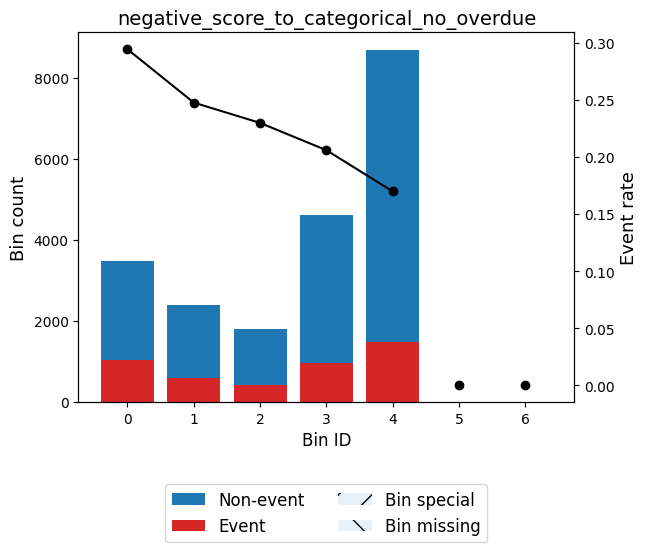

In [35]:
optb.binning_table.plot(metric="event_rate")

In [15]:
log_regression_fit(X_train, y_train, 'models_saved/classic_models/logistic_regression/')

LogRegression train score: 0.786


d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
log_reg_pred = log_regression_predict_with_target(X_test, y_test, 'models_saved/classic_models/logistic_regression/')

LogRegression test score: 0.7843333333333333


In [ ]:
# df_bki['application_id'].value_counts()

In [ ]:
df_test = pd.get_dummies(df_bki.loc[(df_bki['application_id'] == 53123153) | (df_bki['application_id'] == 52175920)][['application_id', 'trade_acct_type1', 'trade_loan_kind_code']], columns=['trade_acct_type1', 'trade_loan_kind_code'], dtype=int)

In [ ]:
# df_test

In [ ]:
df_test.groupby(['application_id']).sum()

,trade_acct_type1_1.0,trade_acct_type1_4.7,trade_acct_type1_8.0,trade_acct_type1_9.0,trade_acct_type1_14.0,trade_acct_type1_15.0,trade_acct_type1_19.0,trade_acct_type1_99.0,trade_loan_kind_code_1.0,trade_loan_kind_code_2.0,trade_loan_kind_code_3.0,trade_loan_kind_code_4.0,trade_loan_kind_code_5.0,trade_loan_kind_code_7.0,trade_loan_kind_code_99.0
application_id,,,,,,,,,,,,,,,
52175920,2,1,6,1,1,2,311,59,3,1,366,2,7,3,1
53123153,1,0,0,0,1,2,476,12,2,0,485,0,5,0,0


In [ ]:
# df_bki['trade_opened_dt'].value_counts().sort_index(ascending=True)

In [ ]:
# df_bki[(df_bki['application_id'] == 53123153)]['trade_opened_dt'].value_counts().sort_index(ascending=True)

In [ ]:
# df_bki[(df_bki['application_id'] == 53123153)]['trade_close_dt'].value_counts().sort_index(ascending=True)

In [ ]:
df_bki[(df_bki['application_id'] == 53123153)][['trade_opened_dt', 'trade_close_dt']].sort_values('trade_opened_dt').head()

,trade_opened_dt,trade_close_dt
282915,2013-04-11,2018-08-08
246354,2013-12-25,2018-08-06
257865,2014-05-06,2018-05-06
253527,2014-07-04,NaN
253487,2018-05-15,2018-06-04


In [50]:
df_test1 = pd.pivot_table(df_bki[['application_id', 'account_amt_credit_limit', 'trade_loan_kind_code']], values=['account_amt_credit_limit'], index=['application_id'], columns=['trade_loan_kind_code'], aggfunc='sum').reset_index()

In [51]:
df_test1 = df_test1.fillna(0.0)

In [52]:
df_test1.columns = [(c[0] + '_' + str(c[1])) if c[1] else c[0] for c in df_test1.columns.tolist()]

In [53]:
df_test1.head()

,application_id,account_amt_credit_limit_1.0,account_amt_credit_limit_2.0,account_amt_credit_limit_3.0,account_amt_credit_limit_4.0,account_amt_credit_limit_5.0,account_amt_credit_limit_6.0,account_amt_credit_limit_7.0,account_amt_credit_limit_99.0
0,51534101,387063.66,0.0,110394.95,0.0,0.0,0.0,0.0,0.0
1,51534210,5300.00,0.0,88329.00,0.0,0.0,0.0,0.0,0.0
2,51534377,0.00,0.0,17000.00,0.0,56000.0,0.0,0.0,0.0
3,51534467,119726.58,0.0,0.00,15000.0,15000.0,0.0,0.0,0.0
4,51534573,497962.00,0.0,211845.38,16856.0,188000.0,0.0,190000.0,0.0


In [ ]:
pd.merge(df_test1, df_target, left_on='application_id', right_on='application_id')

In [ ]:
df_test1.loc[53123153]

                          trade_loan_kind_code
account_amt_credit_limit  1.0                      799000.00
                          2.0                           0.00
                          3.0                     7899652.09
                          4.0                           0.00
                          5.0                      270000.10
                          6.0                           0.00
                          7.0                           0.00
                          99.0                          0.00
Name: 53123153, dtype: float64

In [ ]:
df_test2 = pd.pivot_table(df_bki[['application_id', 'account_amt_credit_limit', 'trade_loan_kind_code']], values=['account_amt_credit_limit'], index=['application_id'], columns=['trade_loan_kind_code'], aggfunc='mean')

In [ ]:
df_test2 = df_test2.fillna(0.0)

In [ ]:
df_test2.head()

account_amt_credit_limit                              \
trade_loan_kind_code                     1.0  2.0           3.0      4.0    
application_id                                                              
51534101                        129021.220000  0.0   7885.353571      0.0   
51534210                          5300.000000  0.0   5520.562500      0.0   
51534377                             0.000000  0.0   5666.666667      0.0   
51534467                         59863.290000  0.0      0.000000  15000.0   
51534573                         45269.272727  0.0  30263.625714  16856.0   

                                                       
trade_loan_kind_code     5.0  6.0           7.0  99.0  
application_id                                         
51534101                  0.0  0.0      0.000000  0.0  
51534210                  0.0  0.0      0.000000  0.0  
51534377              28000.0  0.0      0.000000  0.0  
51534467              15000.0  0.0      0.000000  0.0  
51534573              37600.0  0.0  63333.333333  0.0